In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import re
import matplotlib
matplotlib.font_manager._rebuild()

matplotlib.rc("font",family="SimHei")



In [2]:
df = pd.read_csv('web前端.csv',sep=",")
df.head()

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签
0,web前端,上海·杨浦区·五角场,小酱软件,13-26K,本科,在校/应届,互联网
1,web前端,上海·浦东新区·金桥,数策股份,3-4K,本科,在校/应届,计算机软件
2,前端工程师,上海·浦东新区·张江,阿里集团,5-10K,本科,在校/应届,移动互联网
3,web前端,上海·虹口区·四川北路,往圣继学信息科技,8-10K,本科,在校/应届,计算机软件
4,前端工程师,上海,阿里巴巴集团,20-40K·13薪,本科,在校/应届,互联网


In [3]:
offer = df['薪水']

In [4]:
yearOfferMin=pd.Series(dtype=np.float64)
yearOfferMax=pd.Series(dtype=np.float64)
for index,value in offer.items():
    xinshui = re.findall(r'\d+',str(value))
    if(len(xinshui)==3):
        Min = int(xinshui[0])*int(xinshui[2])
        Max = int(xinshui[1])*int(xinshui[2])
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))
    else:
        Min = int(xinshui[0])*12
        Max = int(xinshui[1])*12
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))        
#yearOfferMin.index=offer.index
#yearOfferMax.index=offer.index

yearOfferMax.index=offer.index
yearOfferMin.index=offer.index
df['最低年薪'] = yearOfferMin
df['最高年薪'] = yearOfferMax
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪
0,web前端,上海·杨浦区·五角场,小酱软件,13-26K,本科,在校/应届,互联网,156,312
1,web前端,上海·浦东新区·金桥,数策股份,3-4K,本科,在校/应届,计算机软件,36,48
2,前端工程师,上海·浦东新区·张江,阿里集团,5-10K,本科,在校/应届,移动互联网,60,120
3,web前端,上海·虹口区·四川北路,往圣继学信息科技,8-10K,本科,在校/应届,计算机软件,96,120
4,前端工程师,上海,阿里巴巴集团,20-40K·13薪,本科,在校/应届,互联网,260,520
...,...,...,...,...,...,...,...,...,...
231,交易终端开发工程师C++,上海·浦东新区·张江,信易信息科技,8-15K,本科,在校/应届,计算机软件,96,180
232,web开发工程师,上海·浦东新区·陆家嘴,Bizec,6-10K,本科,在校/应届,计算机软件,72,120
233,医学编辑（西安分部）,上海·浦东新区·张江,博惠医药,7-10K·13薪,本科,在校/应届,医疗/护理/卫生,91,130
234,后端工程师,上海·浦东新区·张江,灿芯半导体(上海...,5-10K·16薪,本科,在校/应届,电子/半导体/集成电路,80,160


In [5]:
tongfen = [20]

df['最高年薪分段']=pd.qcut(df['最高年薪'],q=10)
df['最低年薪分段']=pd.qcut(df['最低年薪'],q=10)

In [6]:
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪,最高年薪分段,最低年薪分段
0,web前端,上海·杨浦区·五角场,小酱软件,13-26K,本科,在校/应届,互联网,156,312,"(304.0, 360.0]","(131.0, 165.0]"
1,web前端,上海·浦东新区·金桥,数策股份,3-4K,本科,在校/应届,计算机软件,36,48,"(23.999, 96.0]","(11.999, 60.0]"
2,前端工程师,上海·浦东新区·张江,阿里集团,5-10K,本科,在校/应届,移动互联网,60,120,"(96.0, 120.0]","(11.999, 60.0]"
3,web前端,上海·虹口区·四川北路,往圣继学信息科技,8-10K,本科,在校/应届,计算机软件,96,120,"(96.0, 120.0]","(87.5, 105.0]"
4,前端工程师,上海,阿里巴巴集团,20-40K·13薪,本科,在校/应届,互联网,260,520,"(400.0, 640.0]","(240.0, 400.0]"
...,...,...,...,...,...,...,...,...,...,...,...
231,交易终端开发工程师C++,上海·浦东新区·张江,信易信息科技,8-15K,本科,在校/应届,计算机软件,96,180,"(160.0, 195.0]","(87.5, 105.0]"
232,web开发工程师,上海·浦东新区·陆家嘴,Bizec,6-10K,本科,在校/应届,计算机软件,72,120,"(96.0, 120.0]","(60.0, 72.0]"
233,医学编辑（西安分部）,上海·浦东新区·张江,博惠医药,7-10K·13薪,本科,在校/应届,医疗/护理/卫生,91,130,"(120.0, 132.0]","(87.5, 105.0]"
234,后端工程师,上海·浦东新区·张江,灿芯半导体(上海...,5-10K·16薪,本科,在校/应届,电子/半导体/集成电路,80,160,"(132.0, 160.0]","(72.0, 87.5]"


In [7]:
df.to_excel("web前端.xlsx",index=False)

In [8]:
dict={}
for i in pd.qcut(df['最高年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

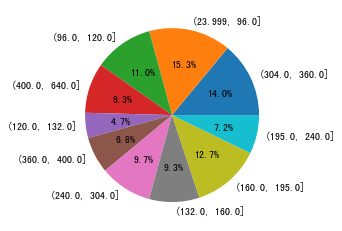

In [9]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

In [10]:
dict={}
for i in pd.qcut(df['最低年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

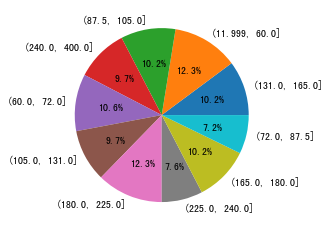

In [11]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

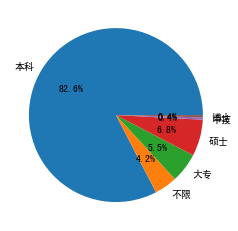

In [12]:
dict={}
for i in df['学历']:
    if not (i in dict.keys()):
        dict[i]=1
    else:
        dict[i]+=1
pyplot.pie(dict.values(),labels=dict.keys(),autopct='%.1f%%')
pyplot.show()

In [13]:
print("最低年薪最高:"+str(df['最低年薪'].max())+"         "+"最低年薪最低:"+str(df['最低年薪'].min())+"      "+"最低年薪中位数:"+str(df['最低年薪'].median())+"      "+"最低年薪众数:"+str(df['最低年薪'].mode())+"      "+"最低年薪均值:"+str(df['最低年薪'].mean()))

最低年薪最高:400         最低年薪最低:12      最低年薪中位数:131.0      最低年薪众数:0    72
dtype: int64      最低年薪均值:147.5084745762712


In [14]:
print("最高年薪最高:"+str(df['最高年薪'].max())+"         "+"最高年薪最低:"+str(df['最高年薪'].min())+"      "+"最高年薪中位数:"+str(df['最高年薪'].median())+"      "+"最高年薪众数:"+str(df['最高年薪'].mode())+"      "+"最高年薪均值:"+str(df['最高年薪'].mean()))

最高年薪最高:640         最高年薪最低:24      最高年薪中位数:195.0      最高年薪众数:0    120
dtype: int64      最高年薪均值:233.135593220339
